In [1]:
whole_nst_sheet = 'https://docs.google.com/spreadsheets/d/1_QY-l4xhMu5nZVluprOgRs6rUzgkkBemapdsg5lFzKU'


import pandas as pd

%matplotlib inline

pd.set_option('display.max_columns', 500)

from gsheets import Sheets

sheets = Sheets.from_files('client_secrets.json')

s = sheets.get(whole_nst_sheet)

main_sheet = s.sheets[1]

df = main_sheet.to_frame(index_col=False)

In [ ]:
import plotly_express as px

In [2]:
zam = df[df['State']=='Zamfara']

In [3]:
len(zam)

133

In [14]:
zam = zam.set_index(pd.to_datetime(zam['Date']))

In [19]:
zam_2019 = zam.loc['2019']

In [25]:
weekly_deaths_2019 = zam_2019.resample('W')['Total Deaths'].sum()



weekly_deaths_2019 = pd.DataFrame(weekly_deaths_2019)

weekly_deaths_2019

weekly_deaths_2019 = weekly_deaths_2019.reset_index()



weekly_deaths_2019.head(2)

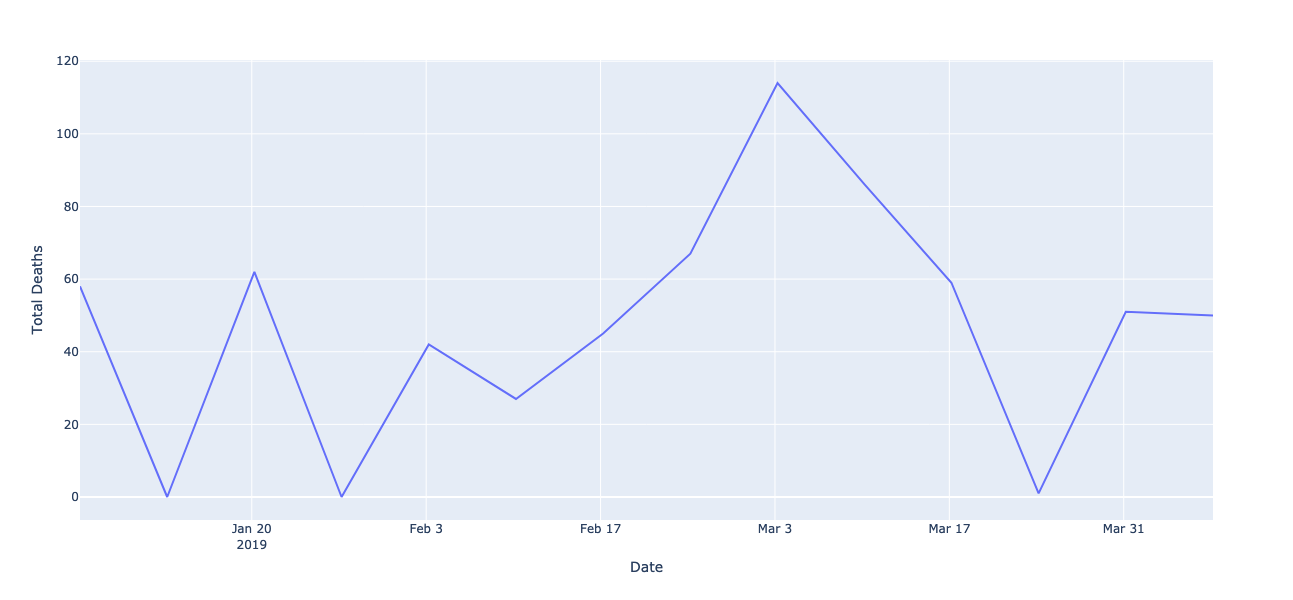

In [26]:
px.line(weekly_deaths_2019, x='Date', y='Total Deaths')

In [29]:
deaths = zam.resample('W')['Total Deaths'].sum()



deaths = pd.DataFrame(deaths)



deaths = deaths.reset_index()



deaths.head(2)

,Date,Total Deaths
0,2011-10-02,19.0
1,2011-10-09,0.0


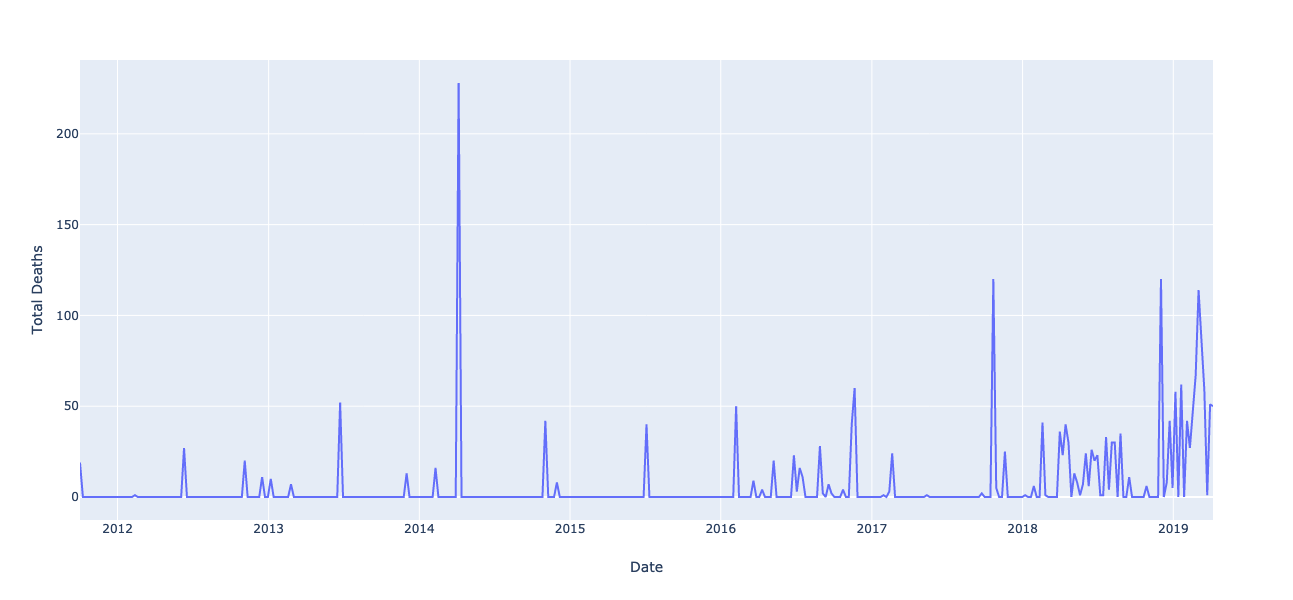

In [30]:
px.line(deaths, x='Date', y='Total Deaths')

In [33]:
zam.head()

,Title,Date,"Community (city,town, ward)",LGA,State,Total Deaths,Boko Haram (P),State Actor (P),Sectarian Actor (excluding BH) (P),Other Armed Actor (P),Kidnapper (P),Robber (P),Other (P),Election-related Actor (P),Cameroon State Actor (P),Boko Haram (V),State Actor (V),Sectarian Actor (V),Other Armed Actor (V),Political Actor (V),Kidnapper (V),Kidnapee (V),Robber (V),Journalist (V),Civilian (V),Election-related Actor (V),Cameroon State Actor,Bomb,Gun,Machete,Suicide Bombing,Other Weapon,TK,Drinking Establishment,Goverment Building,Church,Mosque,Bank,School,Other Location,Notes,Sources 1,Sources 2,Sources 3,Latitude,Longitude,full place name
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-02,Attacks in Zamfara Leave Nineteen Dead,10/2/2011,Lingyado,NaN,Zamfara,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://news.yahoo.com/19-killed-communal-clash...,http://allafrica.com/stories/201110030310.html,NaN,NaN,NaN,", Zamfara, Nigeria"
2012-02-06,Gunmen Assassinate Businessman in Zamfara,2/6/2012,Gusau Road,Maru,Zamfara,1.0,NaN,NaN,NaN,Other Armed Actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Gun,NaN,NaN,NaN,Targeted Killing,NaN,NaN,NaN,NaN,NaN,NaN,Other,one report,http://allafrica.com/stories/201202080505.html,NaN,NaN,NaN,NaN,"Maru, Zamfara, Nigeria"
2012-06-10,Gunmen Kill 27 in Zamfara,6/10/2012,Dangulbi,Maru,Zamfara,27.0,NaN,NaN,Sectarian Actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,"although reported as robbers, nothing was ston...",http://allafrica.com/stories/201206120146.html,http://allafrica.com/stories/201206120168.html,NaN,NaN,NaN,"Maru, Zamfara, Nigeria"
2012-10-31,Gunmen kill Kaboro Village Head And 16 Others ...,10/31/2012,Kaboro,NaN,Zamfara,20.0,NaN,NaN,NaN,Other Armed Actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,http://saharareporters.com/news-page/gunmen-ki...,http://www.foxnews.com/world/2012/10/31/20-dea...,NaN,NaN,NaN,", Zamfara, Nigeria"
2012-12-14,Ex-Zamfara Commissioner Shot Dead,12/14/2012,NaN,Gusau,Zamfara,1.0,NaN,NaN,NaN,Other Armed Actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gun,NaN,NaN,NaN,Targeted Killing,NaN,NaN,NaN,NaN,NaN,NaN,Other,NaN,http://247ureports.com/ex-zamfara-commissioner...,http://www.tribune.com.ng/news2013/index.php/e...,NaN,NaN,NaN,"Gusau, Zamfara, Nigeria"


In [51]:
#kidnapping incidents in Zamfara
#zam[zam['Kidnapper (P)']=='Kidnapper']

In [38]:
len(zam[zam['Kidnapper (P)']=='Kidnapper'])

13

In [41]:
len(zam[zam['Sectarian Actor (excluding BH) (P)']=='Sectarian Actor'])

13

In [44]:
len(zam[zam['Other Armed Actor (P)']=='Other Armed Actor'])

62

In [46]:
armed_actors_zam = zam[zam['Other Armed Actor (P)']=='Other Armed Actor']

In [47]:
aa_zam = armed_actors_zam.resample('W')['Total Deaths'].sum()



aa_zam = pd.DataFrame(aa_zam)



aa_zam = aa_zam.reset_index()



aa_zam.head(2)

,Date,Total Deaths
0,2012-02-12,1.0
1,2012-02-19,0.0


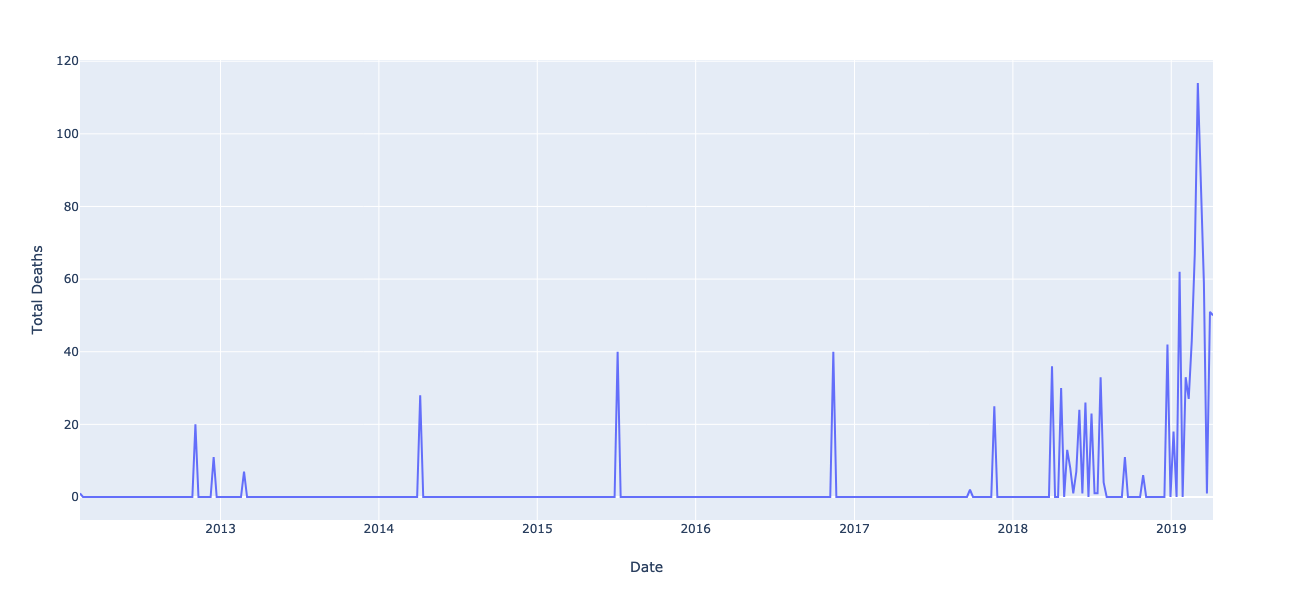

In [48]:
px.line(aa_zam, x='Date', y='Total Deaths')

In [50]:
len(zam[zam['Robber (P)']=='Robber'])

16

In [53]:
len(zam[zam['State Actor (P)']=='State Actor'])

49

In [63]:
state_zam = zam[zam['State Actor (P)']=='State Actor']

In [64]:
len(state_zam)

49

In [65]:
state_zam = state_zam.resample('W')['Total Deaths'].sum()



state_zam = pd.DataFrame(state_zam)



state_zam = state_zam.reset_index()


state_zam.head(2)

,Date,Total Deaths
0,2013-12-01,13.0
1,2013-12-08,0.0


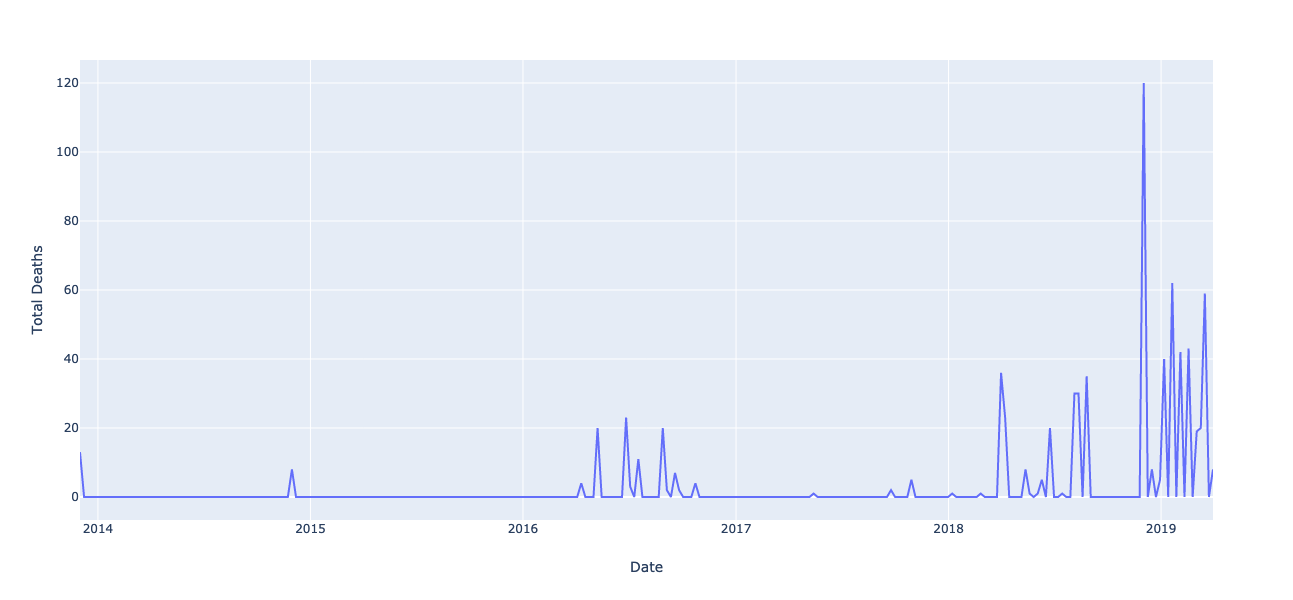

In [66]:
px.line(state_zam, x='Date', y='Total Deaths')

In [67]:
zam.head(2)

,Title,Date,"Community (city,town, ward)",LGA,State,Total Deaths,Boko Haram (P),State Actor (P),Sectarian Actor (excluding BH) (P),Other Armed Actor (P),Kidnapper (P),Robber (P),Other (P),Election-related Actor (P),Cameroon State Actor (P),Boko Haram (V),State Actor (V),Sectarian Actor (V),Other Armed Actor (V),Political Actor (V),Kidnapper (V),Kidnapee (V),Robber (V),Journalist (V),Civilian (V),Election-related Actor (V),Cameroon State Actor,Bomb,Gun,Machete,Suicide Bombing,Other Weapon,TK,Drinking Establishment,Goverment Building,Church,Mosque,Bank,School,Other Location,Notes,Sources 1,Sources 2,Sources 3,Latitude,Longitude,full place name
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-10-02,Attacks in Zamfara Leave Nineteen Dead,10/2/2011,Lingyado,NaN,Zamfara,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://news.yahoo.com/19-killed-communal-clash...,http://allafrica.com/stories/201110030310.html,NaN,NaN,NaN,", Zamfara, Nigeria"
2012-02-06,Gunmen Assassinate Businessman in Zamfara,2/6/2012,Gusau Road,Maru,Zamfara,1.0,NaN,NaN,NaN,Other Armed Actor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,Gun,NaN,NaN,NaN,Targeted Killing,NaN,NaN,NaN,NaN,NaN,NaN,Other,one report,http://allafrica.com/stories/201202080505.html,NaN,NaN,NaN,NaN,"Maru, Zamfara, Nigeria"


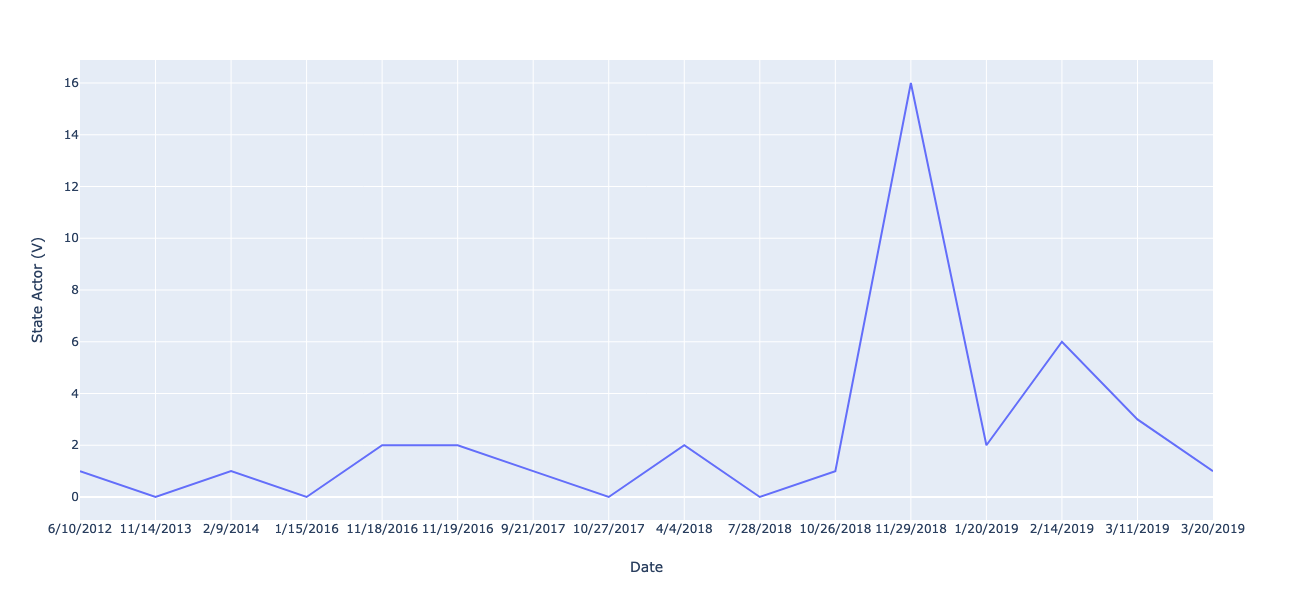

In [79]:
state_vics = zam[zam['State Actor (V)'].notnull() == True]
state_vics = state_vics['State Actor (V)'].resample('W').sum()



state_vics = pd.DataFrame(state_vics)



state_vics = state_vics.reset_index()


state_vics.head(2)

state_vics = zam[zam['State Actor (V)'].notnull() == True]

state_vics = pd.DataFrame(state_vics)



px.line(state_vics, x='Date', y='State Actor (V)')

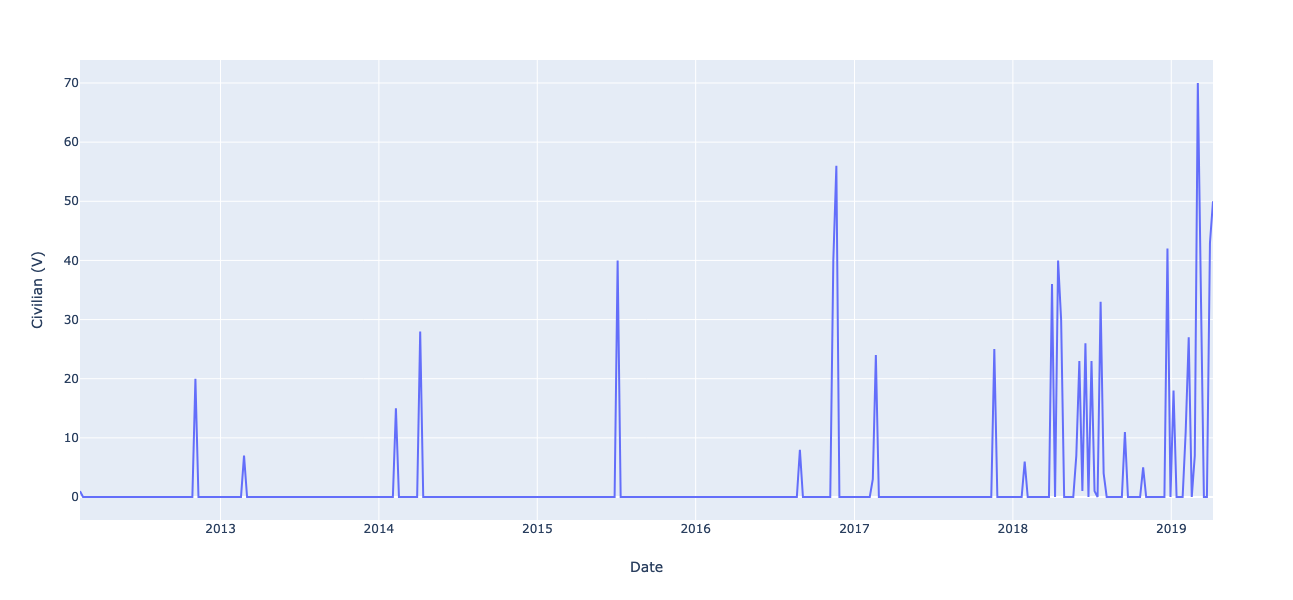

In [82]:
civ_vics = zam[zam['Civilian (V)'].notnull() == True]
civ_vics = civ_vics['Civilian (V)'].resample('W').sum()



civ_vics = pd.DataFrame(civ_vics)



civ_vics = civ_vics.reset_index()


civ_vics = pd.DataFrame(civ_vics)



px.line(civ_vics, x='Date', y='Civilian (V)')

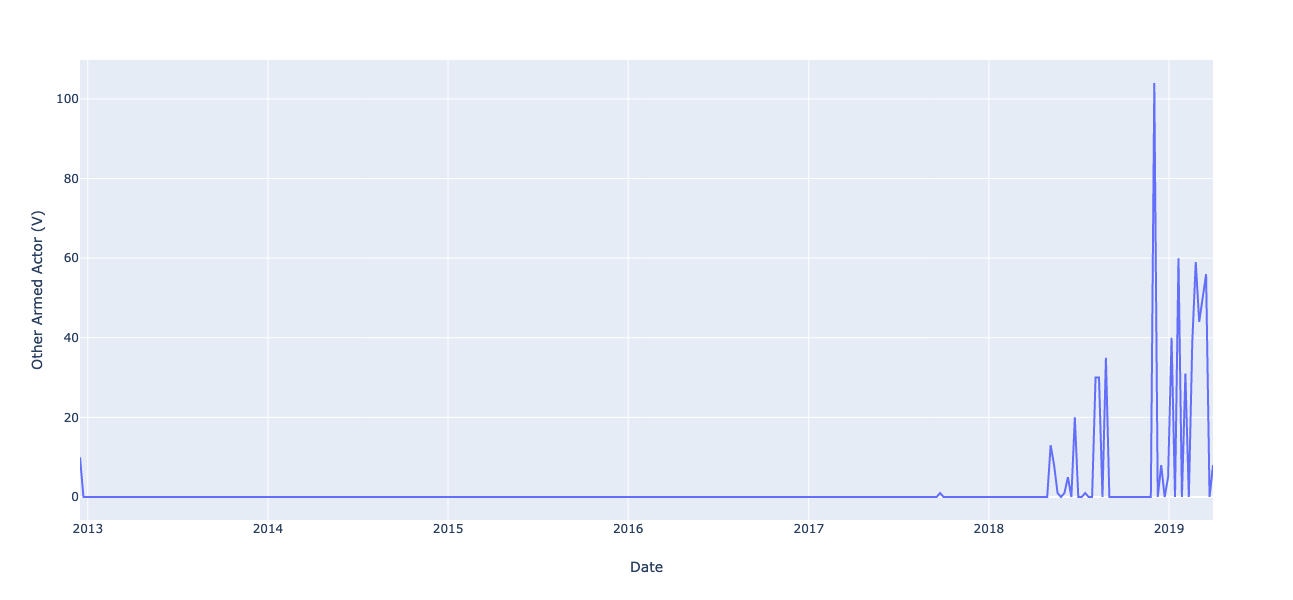

In [83]:
oaa_vics= zam[zam['Other Armed Actor (V)'].notnull() == True]
oaa_vics = oaa_vics['Other Armed Actor (V)'].resample('W').sum()



oaa_vics = pd.DataFrame(oaa_vics)



oaa_vics = oaa_vics.reset_index()


oaa_ivcs = pd.DataFrame(oaa_vics)



px.line(oaa_vics, x='Date', y='Other Armed Actor (V)')